In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Show code')

Buck Conversor Buck-Boost não inversor 
=========

Um conversor buck-boost não inversor é essencialmente uma combinação em cascata de um conversor de buck seguido por um conversor boost, onde um único
indutor-capacitor é usado para ambos. Este conversor não inverte as polaridades da tensão de saída em relação às polaridades da entrada.

Basicamente, requer o uso de duas chaves e é projetado combinando um conversor buck e um conversor de boost, ambos projetados na mesma topologia de forma que este conversor possa funcionar como Conversor Buck, Boost ou Buck-Boost. O MOSFET 1 é conectado entre a fonte de tensão de entrada e o diodo 1. O indutor está conectado entre o diodo 1 e o MOSFET 2, enquanto o diodo 2 está conectado entre MOSFET 2 e a saída ou capacitor de carga.

#### Esquemático:

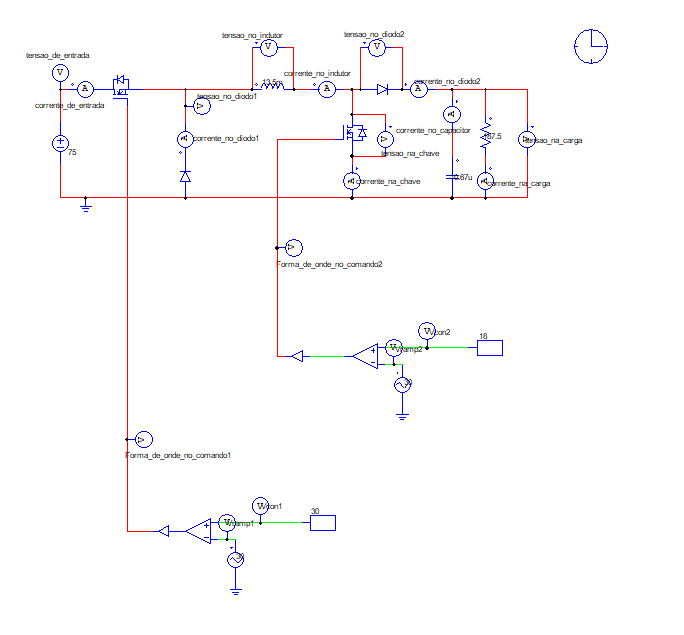

#### Etapas do projeto para cada modo de operação (buck-boost, buck ou boost):

  1. Definir parâmetros de projeto (Vin, Vout, Po, fs, variação de IL e de Vc)
  2. Calcular a razão cíclica (D)
  3. Calcular indutância (L)
  4. Calcular a capacitância (C)
  5. Calcular os esforços nos semicondutores (Ismd, Isef, Ismax, Idmds, Idef, Idmax, Vsmax e Vdmax)
  
##### Valores que serão definidos:
 - Vin = 75V
 - fs = 50KHz
 - D = 0.4
 - Ro = 50 ohms
 - Lo = 3.6 mH
 - Co = 16 uC

### Atuando como conversor Buck-Boost:
Nesta topologia, as chaves MOSFET 1 e MOSFET 2 estão simultaneamente ligadas durante o ciclo de comutação ou on-time, enquanto D1 e D2 estão simultaneamente ligados durante o oposto ciclo de comutação ou off-time.
Isso significa que quando os MOSFETs 1 e 2 estão ligados, o indutor é carregado, assim D1 e D2 estão desligados. Quando D1 e D2 estão ligados, o indutor está carregando o capacitor, logo as duas chaves MOSFETs estão desligadas. 

#### Tensão de Entrada:

In [2]:
Vin = 75
print("A tensão de entrada é", Vin, "V")

A tensão de entrada é 75 V


#### Tensão de Saída: 

In [3]:
Vout = 50
print("A tensão de saída é", Vout, "V")

A tensão de saída é 50 V


#### Potência máxima de saída:

In [4]:
Po = 50
print("A potência máxima de saída é", Po, "W")

A potência máxima de saída é 50 W


#### Frequência de comutação: 

In [5]:
fs = 50000
print("A frequência de comutação é", fs, "Hz")

A frequência de comutação é 50000 Hz


#### Razão ciclíca:

$$D = {Vout \over (Vout + Vin)}$$

In [6]:
D = Vout/(Vout+Vin)
print("A razão ciclíca é", D)

A razão ciclíca é 0.4


#### Corrente de saída:

$$Io = {Po \over Vout}$$

In [7]:
Io = Po/Vout
print("A corrente de saída é", "%.3f" % Io, "A")

A corrente de saída é 1.000 A


#### Ondulação de corrente no indutor:

###### Ondulação de 10%:
$$\Delta_{Il} = 0.1(Io + {Po \over Vin})$$

In [8]:
delta_Il = 0.1*(Io + Po/Vin)
print("A ondulação de corrente no indutor é", "%.3f" % delta_Il, "A")

A ondulação de corrente no indutor é 0.167 A


#### Ondulação de tensão no capacitor:

###### Ondulação de 1%:
$$\Delta_{Vc} = 0.01Vout$$

In [9]:
delta_Vc = 0.01*Vout
print("A ondulação de tensão no capacitor é", delta_Vc, "V")

A ondulação de tensão no capacitor é 0.5 V


#### Resistência de carga:

$$Ro = {Vout^2 \over Po}$$

In [10]:
Ro = (Vout**2)/Po
print("A resistência de carga é", Ro, "ohms")

A resistência de carga é 50.0 ohms


#### Indutor de Saída:

$$Lo = {VinD \over fs\Delta_{Il}}$$

In [11]:
Lo = Vin*D/(fs*delta_Il)
print("O indutor de saída é", "%.4f" % Lo, "H")

O indutor de saída é 0.0036 H


#### Capacitor de Saída:

$$Co = {IoD \over fs\Delta_{Vc}}$$

In [12]:
Co = Io*D/(fs*delta_Vc)
print("O capacitor de saída é", Co, "F")

O capacitor de saída é 1.6e-05 F


### Esforços na chave:

#### Valor médio da corrente na chave:

$$Is_{md} = DIo$$

In [13]:
Is_md = D*Io 
print("O valor médio da corrente na chave é", "%.3f" % Is_md, "A")

O valor médio da corrente na chave é 0.400 A


#### Valor eficaz da corrente na chave:

$$Is_{ef} = \sqrt{D}Io$$

In [14]:
Is_ef = (D**0.5)*Io 
print("O valor eficaz da corrente na chave é", "%.3f" % Is_ef, "A")

O valor eficaz da corrente na chave é 0.632 A


#### Valor máximo da corrente na chave:

$$Is_{max} = Io + {\Delta_{Il} \over 2}$$

In [15]:
Is_max = Io + delta_Il/2 
print("O valor máximo da corrente na chave é", Is_max, "A")

O valor máximo da corrente na chave é 1.0833333333333333 A


#### Valor máximo da tensão na chave:

$$Vs_{max} = Vin$$

In [16]:
Vs_max = Vin
print("O valor máximo da tensão na chave é", Vs_max, "V")

O valor máximo da tensão na chave é 75 V


### Esforços no diodo:

#### Valor médio da corrente no diodo:

$$Id_{md} = (1-D)Io$$

In [17]:
Id_md = (1-D)*Io 
print("O valor médio da corrente no diodo é", "%.3f" % Id_md, "A")

O valor médio da corrente no diodo é 0.600 A


#### Valor eficaz da corrente no diodo:

$$Id_{ef} = \sqrt{(1-D)}Io$$

In [18]:
Id_ef = ((1-D)**0.5)*Io 
print("O valor eficaz da corrente no diodo é", "%.3f" % Id_ef, "A")

O valor eficaz da corrente no diodo é 0.775 A


#### Valor máximo da corrente no diodo:

$$Id_{max} = Io + {\Delta_{Il} \over s}$$

In [19]:
Id_max = Io + delta_Il/2 
print("O valor máximo da corrente no diodo é", Id_max, "A")

O valor máximo da corrente no diodo é 1.0833333333333333 A


#### Valor máximo da tensão no diodo:

$$Vd_{max} = Vin$$

In [20]:
Vd_max = Vin
print("O valor máximo da tensão no diodo é", Vd_max, "V")

O valor máximo da tensão no diodo é 75 V


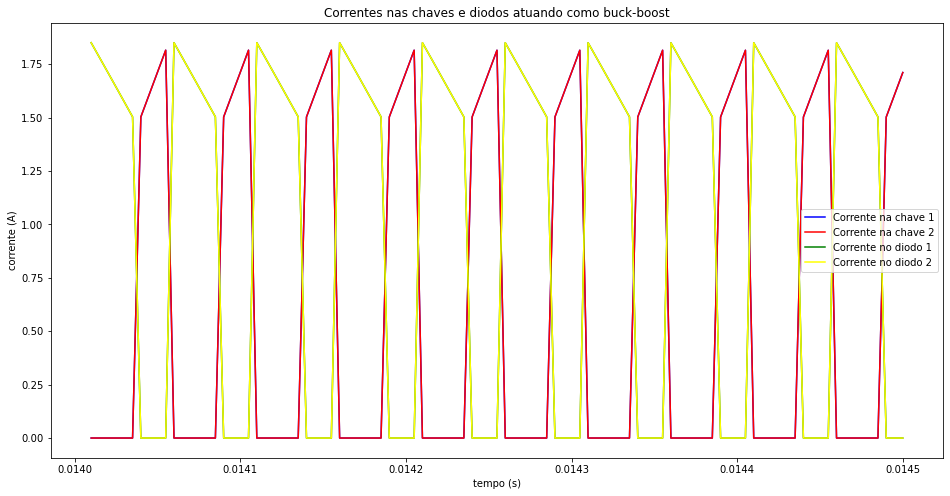

In [21]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/3em1/buck-boost/corrente_chave_diodo.txt')


x = data[:, 0]#tempo
y = data[:, 1]#chave1
z = data[:, 2]#chave2
g = data[:, 3]#diodo1
h = data[:, 4]#diodo2
plt.figure(figsize=(16,8))#altera as dimensões do gráfico
plt.plot(x,y,'blue')
plt.plot(x,z,'red')
plt.plot(x,g,'green')
plt.plot(x,h,'yellow')

plt.title('Correntes nas chaves e diodos atuando como buck-boost')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A)')
plt.legend(['Corrente na chave 1','Corrente na chave 2','Corrente no diodo 1','Corrente no diodo 2'], loc = 'best', fontsize=10)
plt.show()

### Atuando como conversor Buck:
Nesta topologia, a chave MOSFET 2 está sempre desligada e o diodo D2 está sempre ligado. 

##### Valores iguais:

In [22]:
print("A tensão de entrada é", Vin, "V")
print("A frequência de comutação é", fs, "Hz")
print("A razão ciclíca é", D)
print("A resistência de carga é", Ro, "ohms")
print("O indutor de saída é", "%.4f" % Lo, "H")
print("O capacitor de saída é", Co, "F")

A tensão de entrada é 75 V
A frequência de comutação é 50000 Hz
A razão ciclíca é 0.4
A resistência de carga é 50.0 ohms
O indutor de saída é 0.0036 H
O capacitor de saída é 1.6e-05 F


#### Tensão de saída:

$$Vout = VinD$$

In [23]:
Vout2 = Vin*D
print("A tensão de saída é", Vout2, "V")

A tensão de saída é 30.0 V


#### Potência máxima de saída:* 

*mesma fórmula anterior

In [24]:
Po2 = (Vout2**2)/Ro
print("A potência máxima de saída é", Po2, "W")

A potência máxima de saída é 18.0 W


#### Corrente de saída:*

*mesma fórmula anterior

In [25]:
Io2 = Po2/Vout2
print("A corrente de saída é", "%.3f" % Io2, "A")

A corrente de saída é 0.600 A


#### Corrente de ondulção do indutor e tensão de ondulação do capacitor:

$$\Delta_{Il} = {(Vin-Vout)D \over fsLo}$$

$$\Delta_{Vc} = {\Delta_{Il} \over 8fsCo}$$

In [26]:
delta_Il2 = (Vin-Vout2)*D/(fs*Lo)
delta_Vc2 = delta_Il2/(8*fs*Co)
print("A ondulação de corrente no indutor é", "%.3f" % delta_Il2, "A")
print("A ondulação de tensão no capacitor é", "%.3f" % delta_Vc2, "V")

A ondulação de corrente no indutor é 0.100 A
A ondulação de tensão no capacitor é 0.016 V


#### Esforços:*

*mesmas fórmulas anteriores

In [27]:
Is_md2 = D*Io2
print("O valor médio da corrente na chave é", "%.3f" % Is_md2, "A")
Is_ef2 = (D**0.5)*Io2 
print("O valor eficaz da corrente na chave é", "%.3f" % Is_ef2, "A")
Is_max2 = Io2 + delta_Il2/2 
print("O valor máximo da corrente na chave é", "%.3f" % Is_max2, "A")
Vs_max2 = Vin
print("O valor máximo da tensão na chave é", Vs_max2, "V")
Id_md2 = (1-D)*Io2 
print("O valor médio da corrente no diodo é", "%.3f" % Id_md2, "A")
Id_ef2 = ((1-D)**0.5)*Io2 
print("O valor eficaz da corrente no diodo é", "%.3f" % Id_ef2, "A")
Id_max2 = Io2 + delta_Il2/2 
print("O valor máximo da corrente no diodo é", "%.3f" % Id_max2, "A")
Vd_max2 = Vin
print("O valor máximo da tensão no diodo é", Vd_max2, "V")

O valor médio da corrente na chave é 0.240 A
O valor eficaz da corrente na chave é 0.379 A
O valor máximo da corrente na chave é 0.650 A
O valor máximo da tensão na chave é 75 V
O valor médio da corrente no diodo é 0.360 A
O valor eficaz da corrente no diodo é 0.465 A
O valor máximo da corrente no diodo é 0.650 A
O valor máximo da tensão no diodo é 75 V


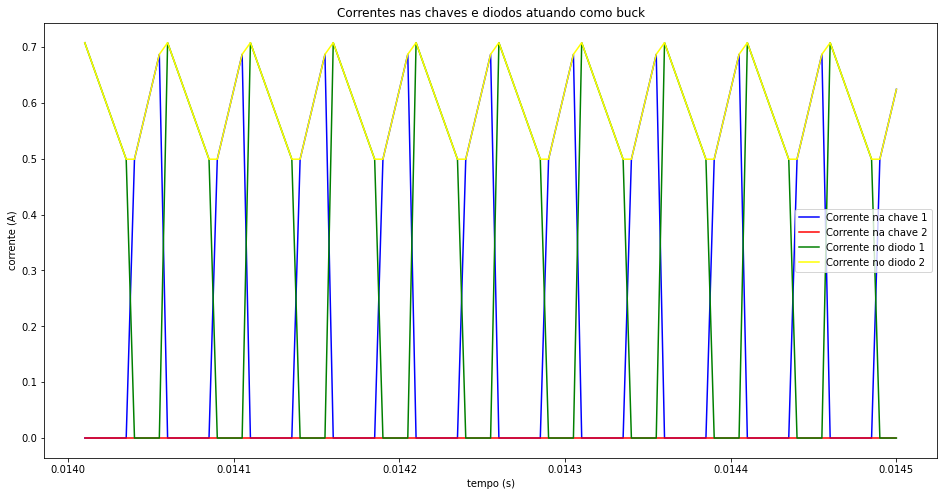

In [28]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/3em1/buck/corrente_chave_diodo.txt')


x = data[:, 0]#tempo
y = data[:, 1]#chave1
z = data[:, 2]#chave2
g = data[:, 3]#diodo1
h = data[:, 4]#diodo2
plt.figure(figsize=(16,8))#altera as dimensões do gráfico
plt.plot(x,y,'blue')
plt.plot(x,z,'red')
plt.plot(x,g,'green')
plt.plot(x,h,'yellow')

plt.title('Correntes nas chaves e diodos atuando como buck')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A)')
plt.legend(['Corrente na chave 1','Corrente na chave 2','Corrente no diodo 1','Corrente no diodo 2'], loc = 'best', fontsize=10)
plt.show()

Ao se analisar esses gráficos nota-se que a chave 2 está em aberto, não apresentando corrente. E, por isso, a corrente no diodo 2 é a própria corrente do indutor. O que já era esperado para o funcionamento como conversor Buck. 

### Atuando como conversor Boost: 
Nesta topologia, a chave MOSFET 1 está sempre ligada e o diodo D1 está sempre desligado. 

##### Valores iguais:

In [29]:
print("A tensão de entrada é", Vin, "V")
print("A frequência de comutação é", fs, "Hz")
print("A razão ciclíca é", D)
print("A resistência de carga é", Ro, "ohms")
print("O indutor de saída é", "%.4f" % Lo, "H")
print("O capacitor de saída é", Co, "F")

A tensão de entrada é 75 V
A frequência de comutação é 50000 Hz
A razão ciclíca é 0.4
A resistência de carga é 50.0 ohms
O indutor de saída é 0.0036 H
O capacitor de saída é 1.6e-05 F


#### Tensão de saída:

$$Vout = {Vin \over (1-D)}$$

In [30]:
Vout3 = Vin/(1-D)
print("A tensão de saída é", Vout3, "V")

A tensão de saída é 125.0 V


#### Potência máxima de saída:* 

*mesma fórmula anterior

In [31]:
Po3 = (Vout3**2)/Ro
print("A potência máxima de saída é", Po3, "W")

A potência máxima de saída é 312.5 W


#### Corrente de saída:*

*mesma fórmula anterior

In [32]:
Io3 = Po3/Vout3
print("A corrente de saída é", "%.3f" % Io3, "A")

A corrente de saída é 2.500 A


#### Corrente de ondulção do indutor e tensão de ondulação do capacitor:

$$\Delta_{Il} = {VinD \over fsLo}$$

$$\Delta_{Vc} = {IoD \over fsCo}$$

In [33]:
delta_Il3 = Vin*D/(fs*Lo)
delta_Vc3 = D*Io3/(fs*Co)
print("A ondulação de corrente no indutor é", "%.3f" % delta_Il3, "A")
print("A ondulação de tensão no capacitor é", "%.3f" % delta_Vc3, "V")

A ondulação de corrente no indutor é 0.167 A
A ondulação de tensão no capacitor é 1.250 V


#### Esforços:*

*mesmas fórmulas anteriores

In [34]:
Is_md3 = D*Io3
print("O valor médio da corrente na chave é", "%.3f" % Is_md3, "A")
Is_ef3 = (D**0.5)*Io3
print("O valor eficaz da corrente na chave é", "%.3f" % Is_ef3, "A")
Is_max3 = Io3 + delta_Il3/2 
print("O valor máximo da corrente na chave é", "%.3f" % Is_max3, "A")
Vs_max3 = Vin
print("O valor máximo da tensão na chave é", Vs_max3, "V")
Id_md3 = (1-D)*Io3
print("O valor médio da corrente no diodo é", "%.3f" % Id_md3, "A")
Id_ef3 = ((1-D)**0.5)*Io3 
print("O valor eficaz da corrente no diodo é", "%.3f" % Id_ef3, "A")
Id_max3 = Io3 + delta_Il3/2 
print("O valor máximo da corrente no diodo é", "%.3f" % Id_max3, "A")
Vd_max3 = Vin
print("O valor máximo da tensão no diodo é", Vd_max3, "V")

O valor médio da corrente na chave é 1.000 A
O valor eficaz da corrente na chave é 1.581 A
O valor máximo da corrente na chave é 2.583 A
O valor máximo da tensão na chave é 75 V
O valor médio da corrente no diodo é 1.500 A
O valor eficaz da corrente no diodo é 1.936 A
O valor máximo da corrente no diodo é 2.583 A
O valor máximo da tensão no diodo é 75 V


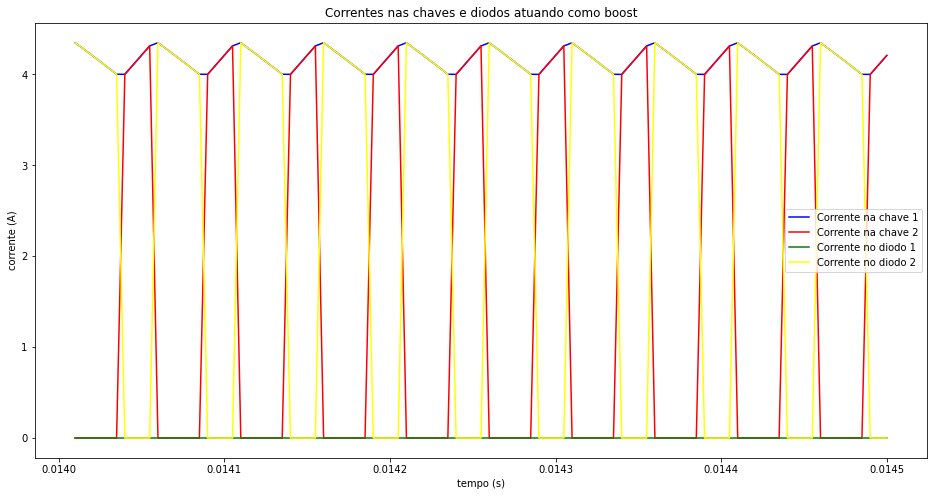

In [35]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/3em1/boost/corrente_chave_diodo.txt')


x = data[:, 0]#tempo
y = data[:, 1]#chave1
z = data[:, 2]#chave2
g = data[:, 3]#diodo1
h = data[:, 4]#diodo2
plt.figure(figsize=(16,8))#altera as dimensões do gráfico
plt.plot(x,y,'blue')
plt.plot(x,z,'red')
plt.plot(x,g,'green')
plt.plot(x,h,'yellow')

plt.title('Correntes nas chaves e diodos atuando como boost')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A)')
plt.legend(['Corrente na chave 1','Corrente na chave 2','Corrente no diodo 1','Corrente no diodo 2'], loc = 'best', fontsize=10)
plt.show()

Ao se analisar esses gráficos nota-se que a chave 1 está fechada sempre, por isso, a corrente no diodo 1 é zero, pois o diodo está em OFF. Além disso, é possível notar que a corrente na chave 1 é a própria corrente no indutor. O que já era esperado para o funcionamento como conversor Boost. 

#### Comparações entre corrente e tensão no indutor, e tensão na carga para os três modos de operação:

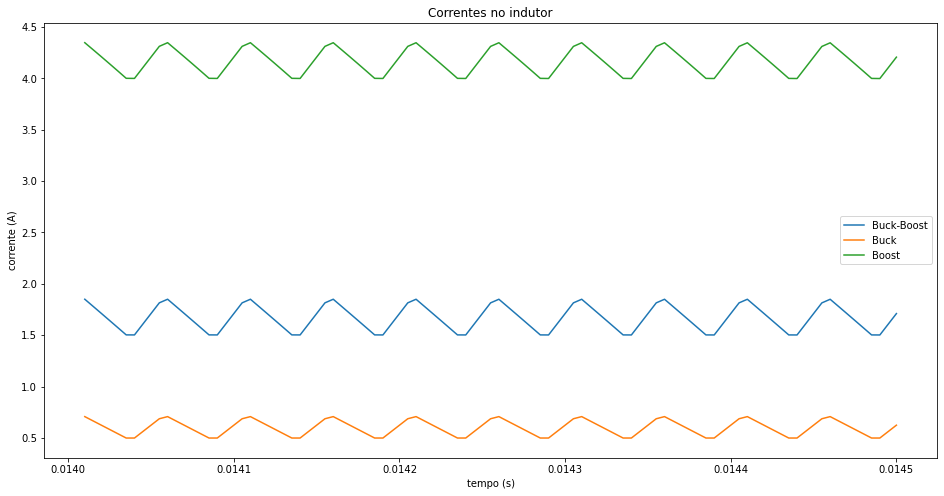

In [36]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/3em1/corrente_no_indutor.txt')


x = data[:, 0]#tempo
y = data[:, 1]#buck-boost
z = data[:, 2]#buck
g = data[:, 3]#boost
plt.figure(figsize=(16,8))#altera as dimensões do gráfico
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,g)

plt.title('Correntes no indutor')
plt.xlabel('tempo (s)')
plt.ylabel('corrente (A)')
plt.legend(['Buck-Boost','Buck','Boost'], loc = 'best', fontsize=10)
plt.show()

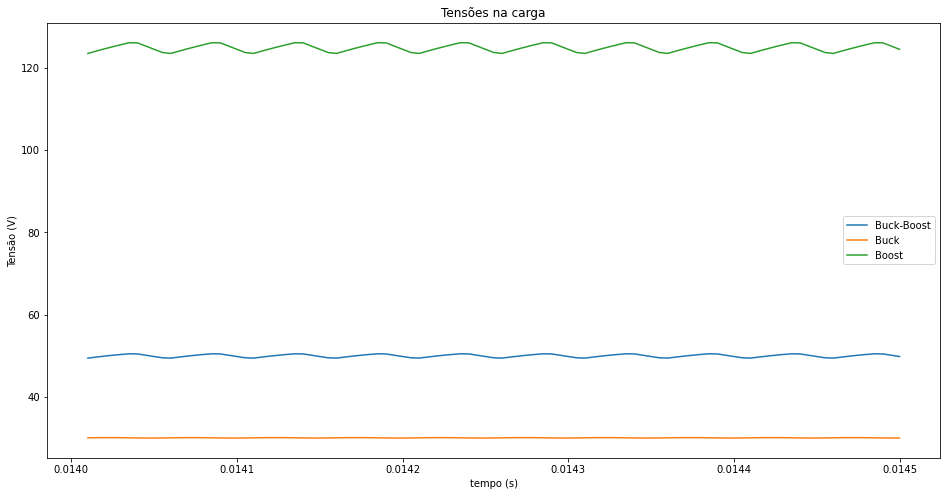

In [37]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/3em1/tensao_na_carga.txt')


x = data[:, 0]#tempo
y = data[:, 1]#buck-boost
z = data[:, 2]#buck
g = data[:, 3]#boost
plt.figure(figsize=(16,8))#altera as dimensões do gráfico
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,g)

plt.title('Tensões na carga')
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.legend(['Buck-Boost','Buck','Boost'], loc = 'best', fontsize=10)
plt.show()

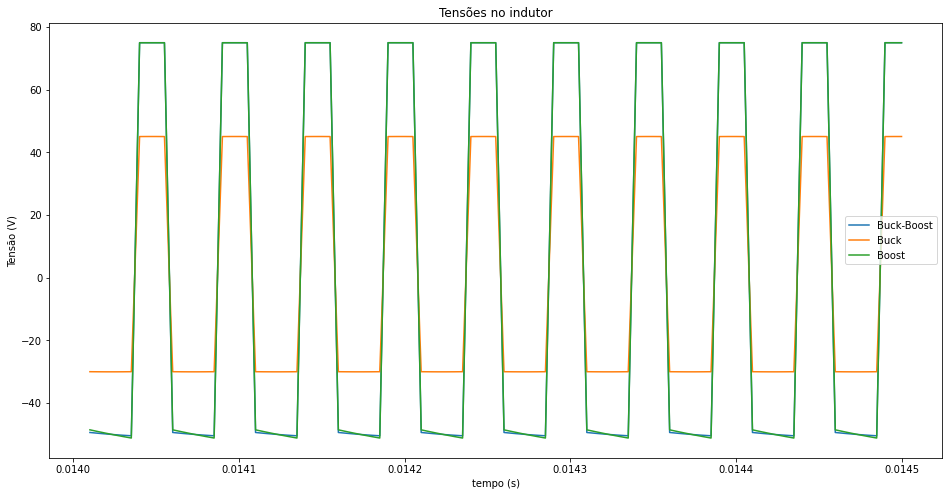

In [38]:
import numpy  as np
import matplotlib.pyplot as plt
data = np.loadtxt('dados/3em1/tensao_no_indutor.txt')


x = data[:, 0]#tempo
y = data[:, 1]#buck-boost
z = data[:, 2]#buck
g = data[:, 3]#boost
plt.figure(figsize=(16,8))#altera as dimensões do gráfico
plt.plot(x,y)
plt.plot(x,z)
plt.plot(x,g)

plt.title('Tensões no indutor')
plt.xlabel('tempo (s)')
plt.ylabel('Tensão (V)')
plt.legend(['Buck-Boost','Buck','Boost'], loc = 'best', fontsize=10)
plt.show()

### Projeto do Indutor:

- Selecionar o núcleo magnético mais adequado;
- Calcular o número de espiras;
- Calcular tamanho do entreferro;
- Escolher o condutor;
- Verificar a possibilidade da execução do projeto.

#### Selecionar o núcleo magnético adequado

##### Ferrita:

In [39]:
B_max = 0.3
print("O valor da densidade de fluxo magnético máximo é", B_max, "T")
Kw = 0.6
print("O valor do fator de utilização da área de enrolamento é", Kw)
J = 450
print("O valor da densidade de corrente no condutor é", J, "A/cm^2")

O valor da densidade de fluxo magnético máximo é 0.3 T
O valor do fator de utilização da área de enrolamento é 0.6
O valor da densidade de corrente no condutor é 450 A/cm^2


In [40]:
Il_max = 4.348
Il_min = 4
Il_rms = 4.148
print("O valor máximo da corrente no indutor é", Il_max, "A")
print("O valor mínimo da corrente no indutor é", Il_min, "A")
print("O valor RMS da corrente no indutor é", Il_rms, "A")
print("Cosiderando os maiores valores - atuando como conversor boost")

O valor máximo da corrente no indutor é 4.348 A
O valor mínimo da corrente no indutor é 4 A
O valor RMS da corrente no indutor é 4.148 A
Cosiderando os maiores valores - atuando como conversor boost


$$AeAw = {LoI_{lmax}I_{lrms}10^4 \over B_{max}K_{w}J}$$

In [41]:
A_eA_w = Lo*Il_max*Il_rms*10**4/(B_max*Kw*J)
print("A multiplicação entre a área efetiva e a área da janela do núcleo é", A_eA_w,"cm^4")

A multiplicação entre a área efetiva e a área da janela do núcleo é 8.015779555555557 cm^4


###### Tabela: Núcleos Magnéticos de ferrite com geométrica EE
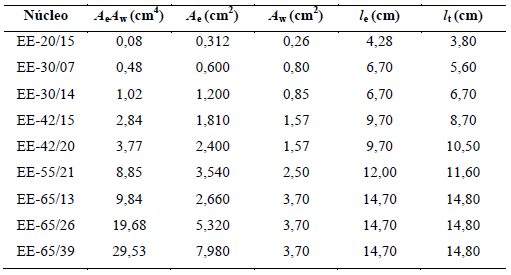

In [42]:
A_eA_w = 9.84
A_e = 2.66
A_w = 3.7
le = 14.7
lt = 14.8
print("A multiplicação entre a área efetiva e a área da janela do núcleo será", A_eA_w,"cm^4 - valor mais próximo do valor calculado")
print("A área efetiva será", A_e,"cm^2 - valor escolhido pela tabela")
print("A área da janela do núcleo será", A_w,"cm^2 - valor escolhido pela tabela")
print("O comprimento do caminho magnético será", le,"cm - valor escolhido pela tabela")
print("O comprimento médio de uma espira será", lt,"cm - valor escolhido pela tabela")

A multiplicação entre a área efetiva e a área da janela do núcleo será 9.84 cm^4 - valor mais próximo do valor calculado
A área efetiva será 2.66 cm^2 - valor escolhido pela tabela
A área da janela do núcleo será 3.7 cm^2 - valor escolhido pela tabela
O comprimento do caminho magnético será 14.7 cm - valor escolhido pela tabela
O comprimento médio de uma espira será 14.8 cm - valor escolhido pela tabela


#### Número de espiras

$$N = {LoI_{lmax}10^4 \over B_{max}A_{e}}$$

In [43]:
N = Lo*Il_max*10**4/(B_max*A_e)
N = int(N)
print("O número de espiras é", N)

O número de espiras é 196


#### Tamanho do entreferro

$$l_{g} = {N2u_{o}A_{e} \over Lo10^4}$$

In [44]:
uo = 4*3.1415926535897931*10**(-7)
lg = N**2*uo*A_e/(Lo*10**4)
print("O tamanho do entreferro é", "%.3f" % (lg*10**3), "mm")

O tamanho do entreferro é 3.567 mm


#### Dimensionamento dos condutores

$$I_{tot} = 1.1Nl_{t}$$

$$S_{fio} = {I_{lrms} \over J}$$

In [45]:
ltot = 1.1*N*lt
print("O comprimento total do condutor é", "%.3f" % ltot, "m")
Sfio = Il_rms/J
print("O valor mínimo da bitola é", "%.3f" % (Sfio*10**2), "mm^2")

O comprimento total do condutor é 3190.880 m
O valor mínimo da bitola é 0.922 mm^2


###### Tabela: Condutores de cobre:
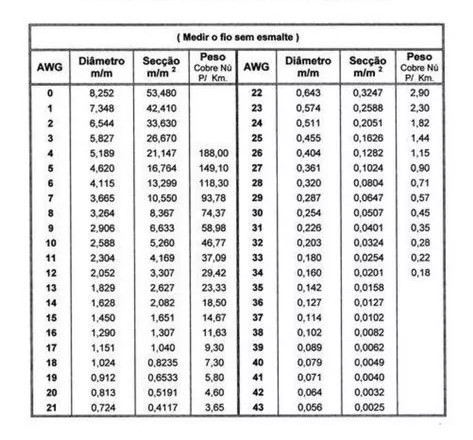

In [46]:
Sfio = 1.040
print("O valor da bitola escolhido pela tabela acima foi", Sfio, "mm^2 - AWG=17")

O valor da bitola escolhido pela tabela acima foi 1.04 mm^2 - AWG=17


$$A_{w min} = {n_{cond}S_{fio}10^{-2}N \over K_{w}}$$

In [47]:
ncond = 1
A_w_min = ncond*Sfio*10**(-2)*N/Kw
print("A valor mínimo da área da janela do núcleo será", A_w_min,"cm^2")

A valor mínimo da área da janela do núcleo será 3.397333333333334 cm^2


<font color='green'>Como Aw_min é menor que Aw a execução do projeto é possível!!!</font>

### Projeto do Dissipador de Calor:

Para o caso sem dissipador, o calor circula da junção para o ambiente através do encapsulamento. Assim, o circuito térmico se resume apenas à resistência Rjc (junção-case) em série com Rca (case-ambiente), sendo estes parâmetros encontrados no datasheet do componenete. 

Para saber se o componente irá precisar de do dissipador de calor é estimado a temperatura de junção para a aplicação em específico. 

$$T_{j} = R_{ja}P_{T} + T_{a}$$

##### MOSFET 1 (BSC100N10NSF): (pior caso = conversor Boost)

In [48]:
P_T = 156.73*10**(-3)
R_ja = 62
Ta = 50
T_j_1 = R_ja*P_T + Ta
print("A temperatura de junção estimada é", "%.3f" % T_j_1, "°C")

A temperatura de junção estimada é 59.717 °C


<font color='green'>Como 59.717°C é menor que 150°C (máxima temperatura de operação do transistor), o componente não precisa de um dissipador!!!</font>

##### MOSFET 2 (BSC100N10NSF): (pior caso = conversor Boost)

In [49]:
P_T2 = 182.39*10**(-3)
R_ja = 62
Ta = 50
T_j_1 = R_ja*P_T2 + Ta
print("A temperatura de junção estimada é", "%.3f" % T_j_1, "°C")

A temperatura de junção estimada é 61.308 °C


<font color='green'>Como 61.308°C é menor que 150°C (máxima temperatura de operação do transistor), o componente não precisa de um dissipador!!!</font>

##### DIODO 1 (MBR20100CT): (pior caso = conversor Buck-Boost)

In [50]:
P_T3 = 575.9*10**(-3)
R_ja2 = 60
Ta2 = 50
T_j_2 = R_ja2*P_T3 + Ta2
print("A temperatura de junção estimada é", T_j_2, "°C")

A temperatura de junção estimada é 84.554 °C


<font color='green'>Como 84.554°C é bem menor que 175°C (máxima temperatura de operação do diodo), o componente não precisa de um dissipador!!!</font>

##### DIODO 2 (MBR20100CT): (pior caso = conversor Boost)

In [51]:
P_T4 = 1.6855
R_ja2 = 60
Ta2 = 50
T_j_2 = R_ja2*P_T4 + Ta2
print("A temperatura de junção estimada é", T_j_2, "°C")

A temperatura de junção estimada é 151.13 °C


<font color='red'>Como 151.13°C é maior que 80% de 175°C (máxima temperatura de operação do diodo), o componente precisa de um dissipador!!!</font>

#### Dimensionamento do dissipador de calor para o diodo 2

O uso do dissipador de calor insere uma baixa resistência térmica em paralelo com a resistência $R_{ca}$ do componente. Tal associação permite reduzir a resistência equivalente entre encapsulamento e ambiente e, assim, reduzir as temperaturas de cápsula e da junção. 

Equação que permite calcular a resistência térmica máxima do dissipador de calor:

$$R_{da} \leq {T_{j,max}-T_{a} \over P_{T}} - R_{jc} - R_{cd}$$

Será usado 80% do valor fornecido no $T_{j,max}$ - margem de segurança.

Se o valor encontrado de $R_{da}$ não for comercial, deve ser escolhido um valor menor e mais próximo do calculado. 

$R_{cd}$, ressitência de interface, vai depender do material utilizado para separar o encapsulamento do dissipador de calor. Segue tabela a baixo.  

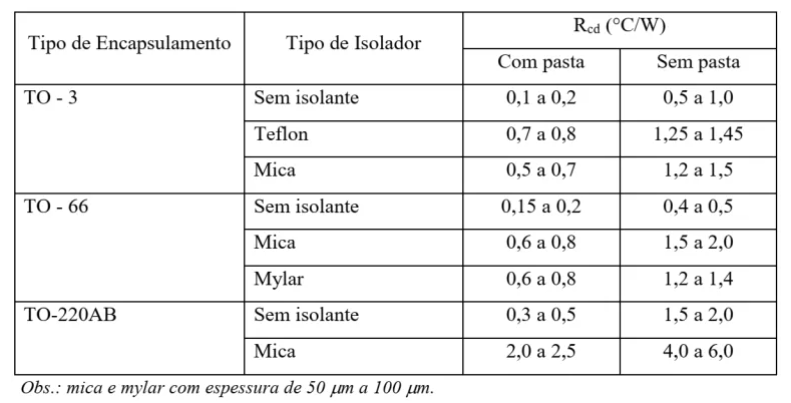

Foi escolhida o tipo TO-220AB, sem isolante e com pasta térmica.

In [52]:
Rjc = 2
Rcd = 0.5
Tjmax = 140
Rda = Tjmax-Ta/P_T4 - Rjc - Rcd
print("A resistência térmica máxima do dissipador é", Rda, "°C/W")

A resistência térmica máxima do dissipador é 107.83521210323346 °C/W


HS 1509

Perímetro: 78 mm

Resistência Térmica: 19,8 ºC / W / 4

Peso Linear: 0,21 kg/m

Capacidade Térmica: 921 J/kg K

In [53]:
Rda = 19.8
Tj = (Rjc + Rda + Rcd)*P_T4 + Ta
print("A temperatura de junção estimada com a presença do dissipador é", Tj, "°C")

A temperatura de junção estimada com a presença do dissipador é 87.58664999999999 °C
